# **Logistic Regression**

## **1. Building the model**

In [0]:
#Import all the necessary packages.
import numpy as np
import pandas as pd
from sklearn import metrics
from scipy.stats import uniform
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [0]:
#Read the dataset into a pandas DataFrame. 
cvd = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [0]:
#Display the dataset. 
cvd

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4


In [0]:
#Check class distribution.
cvd[cvd['cvd_4types']==1]['cvd_4types'].count()

1913

In [0]:
cvd[cvd['cvd_4types']==0]['cvd_4types'].count()

1329

In [0]:
#Check whether there is any null value in the dataset in order to do some cleaning if necessary. 
cvd.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [0]:
#Divide the data into dependent and independent variables and get dummies for the correspoding categorical variables. Then do a train_test_split to split the dataset into training and test.
X=cvd.iloc[:,1:]
y=cvd['cvd_4types']
X=pd.get_dummies(X,columns=['race','educat','mstat','bend25','happy25','tired25','hlthlm25'],drop_first=True)
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
#Fit the data into the model and predict "y" or CVD Risk. 
clf=LogisticRegression()
fitted_model=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

## **4.Finding the best model**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [0]:
#Implement Randomized Search to find the best hyper-parameters and build the best model. 
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'],solver=['saga','sag','lbfgs','newton-cg','liblinear'])
clf = RandomizedSearchCV(clf, distributions, random_state=0,cv=5)
search = clf.fit(X_train,y_train)

In [0]:
#This are the best hyper-parameters. 
search.best_params_

{'C': 2.4942547871438894, 'penalty': 'l2', 'solver': 'liblinear'}

In [0]:
#Fit the data into the model and predict "y" or CVD Risk. Include the previous calculated hyperparameters. 
clf=LogisticRegression(C=2.4942547871438894,solver='liblinear',penalty='l2',random_state=0)
fitted_model=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [0]:
#Print the accuracy score of the model.
accuracy_score(y_test,y_pred)

0.6825885978428351

In [0]:
#Prin the confusion matrix.
confusion_matrix(y_test,y_pred)

array([[134, 148],
       [ 58, 309]])

In [0]:
#Print the classification report, which contains precision, recall and f1-score. 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57       282
           1       0.68      0.84      0.75       367

    accuracy                           0.68       649
   macro avg       0.69      0.66      0.66       649
weighted avg       0.69      0.68      0.67       649



In [0]:
#Calculate log loss score. 
log_loss(y_test,y_pred)

10.963183787012742

In [0]:
#Calculate roc curve.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.6585695789127872

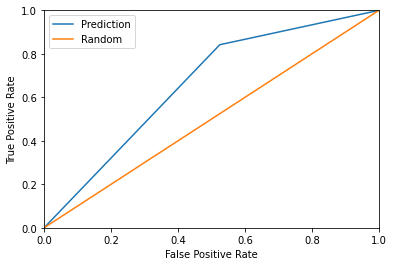

In [0]:
#Plot roc curve. 
plt.plot(fpr, tpr, label = 'Prediction')
plt.plot([0, 1], [0, 1], label = 'Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

However, I found a better model without the RandomizedSearchCV, which has better performance. This is the model we are going to use for the feature importance.

In [0]:
#Fit the data into the model and predict "y" or CVD Risk.
clf=LogisticRegression(C=0.6,solver='liblinear')
fitted_model=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [0]:
#Print the accuracy score of the model.
accuracy_score(y_test,y_pred)

0.6856702619414484

In [0]:
#Prin the confusion matrix.
confusion_matrix(y_test,y_pred)

array([[136, 146],
       [ 58, 309]])

In [0]:
#Print the classification report, which contains precision, recall and f1-score. 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57       282
           1       0.68      0.84      0.75       367

    accuracy                           0.69       649
   macro avg       0.69      0.66      0.66       649
weighted avg       0.69      0.69      0.67       649



In [0]:
#Calculate log loss score. 
log_loss(y_test,y_pred)

10.856744415695822

In [0]:
#Calculate roc curve.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.6621156782035674

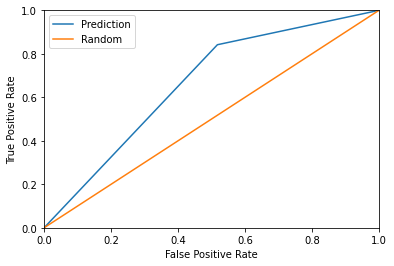

In [0]:
#Plot roc curve. 
plt.plot(fpr, tpr, label = 'Prediction')
plt.plot([0, 1], [0, 1], label = 'Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# **3. Feature Importance**

https://towardsdatascience.com/a-look-into-feature-importance-in-logistic-regression-models-a4aa970f9b0f

In [0]:
# The dataset is "standarized" to calculate coefficients.
clf.fit(X_train/np.std(X_train,0),y_train)

LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#We check which coefficients are positive and which ones are negative. Trues are positive and False are negative.
np.round(clf.coef_,decimals=2)>0

array([[False, False, False,  True, False, False, False,  True,  True,
        False, False, False, False,  True, False, False, False,  True,
         True,  True,  True,  True,  True,  True,  True, False, False,
        False, False, False,  True,  True,  True, False]])

In [0]:
#We check our columns and compare with the previous boolean array.
X_train.columns

Index(['age_s1', 'hip', 'neck20', 'waist', 'av_weight_kg', 'cgpkyr', 'tea15',
       'srhype', 'parrptdiab', 'race_2', 'race_3', 'educat_2', 'educat_3',
       'educat_4', 'mstat_2', 'mstat_3', 'mstat_4', 'mstat_8', 'bend25_2',
       'bend25_3', 'happy25_2', 'happy25_3', 'happy25_4', 'happy25_5',
       'happy25_6', 'tired25_2', 'tired25_3', 'tired25_4', 'tired25_5',
       'tired25_6', 'hlthlm25_2', 'hlthlm25_3', 'hlthlm25_4', 'hlthlm25_5'],
      dtype='object')

In [0]:
#Import RFE, which is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.
from sklearn.feature_selection import RFE
predictors=X_train
selector=RFE(clf,n_features_to_select=1)
selector.fit(predictors,y_train)

RFE(estimator=LogisticRegression(C=0.6, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='liblinear',
                                 tol=0.0001, verbose=0, warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

In [0]:
#We extract the ranking of each of the features.
order=selector.ranking_
order

array([33, 26, 27, 24, 31, 34, 22, 29,  7,  6,  2, 16, 17,  5,  8, 12,  3,
        4, 15, 23, 20, 21, 25, 18, 30, 13, 14, 32, 19, 28, 11, 10,  9,  1])

In [0]:
#Finally, we print the corresponding features ranking ordered from highest to lowest. 
feature_ranks={}
for index,i in enumerate(order):
  feature_ranks[index+1]=X_train.columns[index]
feature_ranks

{1: 'age_s1',
 2: 'hip',
 3: 'neck20',
 4: 'waist',
 5: 'av_weight_kg',
 6: 'cgpkyr',
 7: 'tea15',
 8: 'srhype',
 9: 'parrptdiab',
 10: 'race_2',
 11: 'race_3',
 12: 'educat_2',
 13: 'educat_3',
 14: 'educat_4',
 15: 'mstat_2',
 16: 'mstat_3',
 17: 'mstat_4',
 18: 'mstat_8',
 19: 'bend25_2',
 20: 'bend25_3',
 21: 'happy25_2',
 22: 'happy25_3',
 23: 'happy25_4',
 24: 'happy25_5',
 25: 'happy25_6',
 26: 'tired25_2',
 27: 'tired25_3',
 28: 'tired25_4',
 29: 'tired25_5',
 30: 'tired25_6',
 31: 'hlthlm25_2',
 32: 'hlthlm25_3',
 33: 'hlthlm25_4',
 34: 'hlthlm25_5'}